In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

### Data Extraction
* Extracting resume data from word files in different path. 
* Creating CSV file from the extracted data.

In [2]:
import os
import csv
import docx
import PyPDF2
from docx import Document

def convert_to_csv(directory):
    """This function will take word documents path as an argument and extracts text from the word document 
        and returns csv file with the extracted data
        Input: word files directory
        Output: output.csv file"""
    # List to store the converted data
    data = []

    # Iterate over files and folders in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
        
            if file.endswith('.docx'):
                doc_path = os.path.join(root, file)
                doc = Document(doc_path)
        
                document_data = ''
        
                for paragraph in doc.paragraphs:
                    document_data += paragraph.text + ' '
        
                for table in doc.tables:
                    for row in table.rows:
                        for cell in row.cells:
                            document_data += cell.text + ' '
        
#                 data.append(document_data.strip())
                data.append([file, document_data])

    # Save the data to a CSV file
    csv_file = 'output.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['FileName', 'Resumes'])
        writer.writerows(data)

    print(f"Conversion completed. Converted data saved to {csv_file}.")

# Specify the directory containing the documents
directory = r'C:\Users\AANANTHA PRIYA S M\Desktop\p2\final'

# Call the function to convert the documents to CSV
convert_to_csv(directory)


Conversion completed. Converted data saved to output.csv.


### Reading Extracted Dataset from all the word documents.

In [3]:
data = pd.read_csv("output.csv")
data

,FileName,Resumes
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P ...
1,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG Seeking a challenging po...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy CAREER OBJECTIVE: To...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA Experience as UI Developer ...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A Linked In: https://www.lin...
...,...,...
74,Sri Krishna S_Hexaware.docx,\tWorkday Integration Consultant Name ...
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...
76,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...
77,Venkateswarlu B_Hexaware.docx,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [4]:
# Function to extract experience from the resume
def expDetails(Text):
    global sent
   
    Text = Text.split()
   
    for i in range(len(Text)-2):
        Text[i].lower()
        
        if Text[i] ==  'years':
            sent =  Text[i-2] + ' ' + Text[i-1] +' ' + Text[i] +' '+ Text[i+1] +' ' + Text[i+2]
            
            sent = re.sub('[^0-9.]', '', sent)
            sent = re.findall(r'\d+(?:\.\d+)?|\w+', sent)
            return (sent[0])

In [5]:
data['Experience'] = data['Resumes'].apply(expDetails)
data['Experience'] = pd.to_numeric(data['Experience'], errors='coerce')
data['Experience'].fillna(0.0, inplace=True)

In [6]:
pd.set_option('display.max_rows', 80)
data.head()

,FileName,Resumes,Experience
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P ...,0.0
1,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG Seeking a challenging po...,0.0
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy CAREER OBJECTIVE: To...,2.0
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA Experience as UI Developer ...,0.0
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A Linked In: https://www.lin...,3.0


### Text Pre-processing

In [7]:
def remove_underscore(text):
    """This function will take text as an input and 
        returns text in lower case by removing underscore from the text"""
    text = text.lower()
    text = re.sub('_', ' ', text)
    return text

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Replace commas with spaces
    text = re.sub(r',', ' ', text)
    
    # Replace parentheses with spaces
    text = text.replace('(', ' ').replace(')', ' ')
    
    # Replace special characters with spaces
    text = re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove single quotations using regular expressions
    text = re.sub(r"''", " ", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [9]:
data1 = data.copy()

In [10]:
data1["Resumes"] = data['Resumes'].apply(preprocess_text)
data1['FileName'] = data['FileName'].apply(remove_underscore)

### Creating labels/GroundTruth

In [11]:
# Creating Labels/GroundTruth
import warnings
warnings.filterwarnings("ignore")
data1['Label'] = pd.np.where(data1.FileName.str.contains("react developer"), "React JS Developer", 
                pd.np.where(data1.FileName.str.contains("react dev"), "React JS Developer",
                pd.np.where(data1.FileName.str.startswith("internship"), "SQL Developer", 
                pd.np.where(data1.FileName.str.contains("react js developer"), "React JS Developer",
                pd.np.where(data1.FileName.str.contains("reactjs developer"), "React JS Developer", 
                pd.np.where(data1.FileName.str.contains("peoplesoft"), "Peoplesoft", 
                pd.np.where(data1.FileName.str.contains("hexaware"), "Workday", 
                pd.np.where(data1.FileName.str.contains("heaware"), "Workday", "SQL Developer"))))))))

In [12]:
data_set = data1.copy()
data_set.drop(columns=['FileName'], inplace=True)

In [13]:
data_set.Label.value_counts()

React JS Developer    22
Workday               21
Peoplesoft            20
SQL Developer         16
Name: Label, dtype: int64

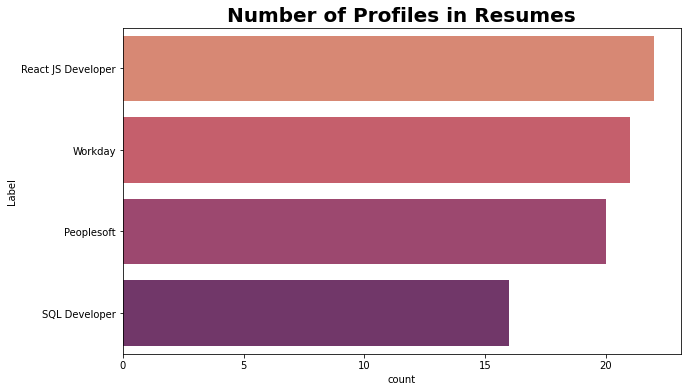

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
# Adding Title of chart
plt.title('Number of Profiles in Resumes', fontsize = 20,fontweight='bold')

sns.countplot(y = "Label" , data = data_set, order = data_set['Label'].value_counts().index, palette = "flare");

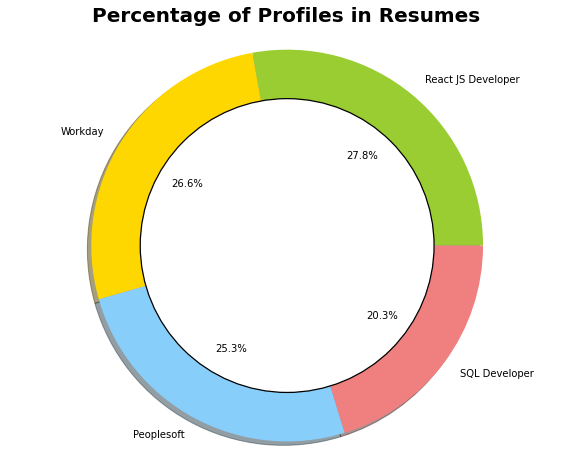

In [15]:

plt.figure(figsize=(10, 8))
plt.title("Percentage of Profiles in Resumes",fontsize = 20, fontweight = "bold")
Labels = ['React JS Developer', 'Workday', 'Peoplesoft', 'SQL Developer']
values = [22, 21, 20, 16]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)

plt.pie(values, explode=explode, labels=Labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  


### Extracting skills from React JS Resumes

In [16]:
pd.set_option('display.max_rows', 80)
react_js_df = data_set[data_set['Label'] == 'React JS Developer'].reset_index(drop=True)

In [17]:
# Regex patterns to extract to skills from React JS Resumes
def get_react_js_skills(text):
    text = re.findall('technical expertise(.*?)personal detail|technical skill(.*?)qualification|skill(.*?)soft skill|programming language(.*?)positive attitude|core skill(.*?)personal detail|technical skill(.*?)education|technical proficiency(.*?)educational profile|technical proficiency(.*?)academic|technical skill(.*?)project|technical skill(.*?)work experience|technical skill(.*?)todo', text)
    return text

In [18]:
react_js_df['processed_skills'] = react_js_df['Resumes'].apply(get_react_js_skills)

In [19]:
# here this code is used to place data in specific row which are extracted from the findall ina tuple format
react_skills = []                    

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)


for skill in react_js_df['processed_skills']:
    result = map(join_tuple_string, skill)
    proc_skill = list(result)
    react_skills.append(proc_skill)

skill_res = map(join_tuple_string, react_skills)
final_reachjs = list(skill_res)
react_js_df['processed_skills'] = final_reachjs

In [20]:
react_js_df['processed_skills'] = react_js_df['processed_skills'].apply(preprocess_text) 

In [21]:
all_react_skills = [' '.join(react_js_df['processed_skills'].str.strip('"').tolist())]

In [22]:
print(all_react_skills)

['web technology html5 css3 javascript responsive design bootstrap reactjs json development tool visual studio code operating system window 10 real world overall growth organization professional career work experience strength achievement declaration c reactjs javascript sql server software package office web technology html c operating system window ubuntu   programming language java javascript mysql spring boot reactjs angular css3 bootstrap html5   language c web technology react bootstrap javascript json web technology html javascript bootstrap library reactjs hook redux knowledge style sheet css3 sa knowledge web technology html css3 xml javascript json react j nodejs github web technology html css3 xml javascript json react j nodejs github  key skill html5 css3 javascript jquery json bootstrap responsive design framework react j window dev tool microsoft visual studio ce tool microsoft ce suite edit plus notepad  development react j redux html c bootstrap jquery javascript ide ex

In [23]:
all_react_skills[0] = all_react_skills[0].replace('visual studio', 'visualstudio')
all_react_skills[0] = all_react_skills[0].replace('operating system', 'operatingsystem')
all_react_skills[0] = all_react_skills[0].replace('sql server', 'sqlserver')
all_react_skills[0] = all_react_skills[0].replace('react j', 'reactjs')
all_react_skills[0] = all_react_skills[0].replace('spring boot', 'springboot')
all_react_skills[0] = all_react_skills[0].replace('node j', 'nodejs')
all_react_skills[0] = all_react_skills[0].replace('window xp', 'windowxp')
all_react_skills[0] = all_react_skills[0].replace('designing website', 'websitedesigning')
all_react_skills[0] = all_react_skills[0].replace('programming language', 'programminglanguage')
all_react_skills[0] = all_react_skills[0].replace('responsive design', 'responsivedesign')
all_react_skills[0] = all_react_skills[0].replace(' web technology', ' webtechnology')

In [24]:
tokenreact = word_tokenize(all_react_skills[0])
# stop_words_react = list(set(stopwords.words('english')))
removal_words = ['different','working','educational', 'work', 'tool', 'library', 'functionality', 'technology', 'develop',
                 'developing','declaration','career', 'experience', 'client', 'worked', 'edit', 'material',
                 'organization', 'till', 'developer', 'august', 'using', 'professional', 'plus', 'requirement', 'responsibility',
                 'date', 'jr', 'knowledge', 'achievement', 'design', 'real', 'pune', 'mockup', 'key', 'strength', 'create',
                 'involved', 'resolution', 'skill', 'per', 'currently','ce', 'role', 'world', 'company', 'growth', 'style', 'ecommerce',
                 'overall', '7', '8', '10', 'component', '2020', '1', '2', 'various','sharukabdul', 'todo', 'list', 'simple', 'following',
                 'feature' , 'user', 'add', 'delete', 'mark', 'complete','item','used', 'state',  'management', 'highlight', 'status', 
                 'red', 'cross', 'completion', 'language', 'english', 'hindi', 'telugu', 'read', 'write', 'speak', 'hereby', 'declare', 
                 'furnished', 'information', 'correct','true', 'best', 'place', 'shaik', 'abdul', 'sharuk', 'built','notepad','github',
                 'saffire','development','repository','sheet','screen','page','office','suite','responsive_design','blog','sa','es6',
                 'window','window_xp','githubcom','microsoft','package','git','hook','project','framework','ide','application',
                 'installers','software','portal','ubuntu','operating_system','bootstap','angular','programminglanguage', 
                'operatingsystem']
# stop_words_react.extend(removal_words)
tokenreact = [token for token in tokenreact if token not in removal_words]
tokenreact_final = list(set(tokenreact))

In [25]:
react_words = ' '. join(tokenreact)

In [26]:
print(react_words)

web html5 css3 javascript responsivedesign bootstrap reactjs json visualstudio code c reactjs javascript sqlserver webtechnology html c java javascript mysql springboot reactjs css3 bootstrap html5 c webtechnology react bootstrap javascript json webtechnology html javascript bootstrap reactjs redux css3 webtechnology html css3 xml javascript json reactjs nodejs webtechnology html css3 xml javascript json reactjs nodejs html5 css3 javascript jquery json bootstrap responsivedesign reactjs dev visualstudio reactjs redux html c bootstrap jquery javascript visualstudio code vscode java windowxp webtechnology html c javascript jquery php reactjs nodejs database mysql visualstudio netbeans code web server apache xampp webtechnology html c javascript jquery php reactjs nodejs database mysql visualstudio netbeans code web server apache xampp webtechnology reactjs javascript html5 css3 softtech react reactjs ui react c ui website reactjs react website websitedesigning c ui reactjs react redux ht

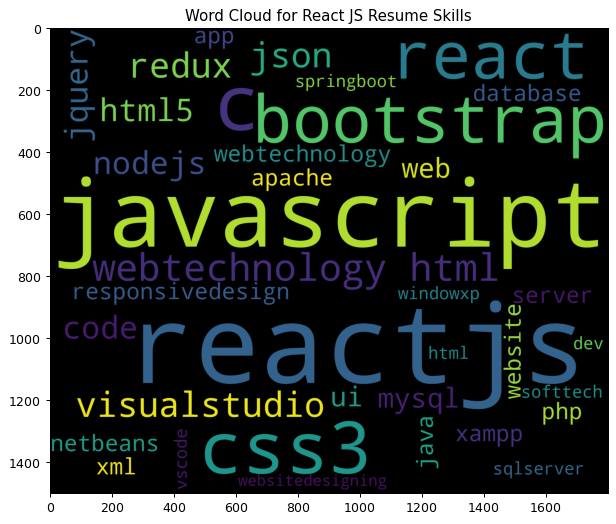

In [27]:
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(react_words)
plt.title('Word Cloud for React JS Resume Skills')
plt.imshow(wordcloud_stw);

In [28]:
react_js_df['Experience'].mean()

2.4045454545454543

- ### Average Experience for React JS Developer profile is 2.4 years

In [29]:
pd.value_counts(np.array(tokenreact)).head(10)

reactjs          14
javascript       12
c                 8
webtechnology     8
css3              7
html              7
react             6
bootstrap         6
redux             5
json              5
dtype: int64

### Top 10 skills for React JS developer 
* reactjs          
* javascript       
* c                
* webtechnology    
* css3             
* html             
* react            
* bootstrap        
* redux            
* json             



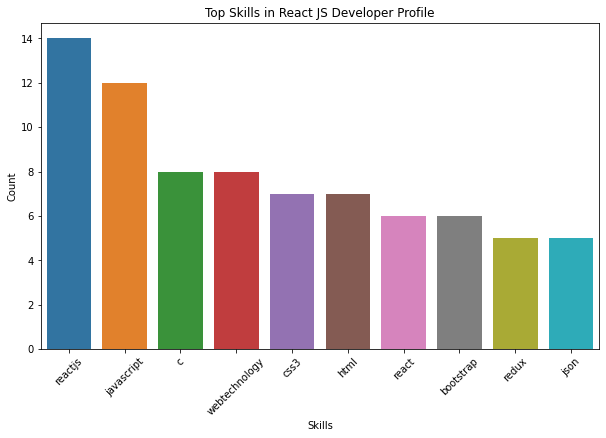

In [30]:
top_react_skill_df = pd.DataFrame(pd.value_counts(np.array(tokenreact)).head(10)).reset_index()
top_react_skill_df.columns = ['Skills', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(top_react_skill_df['Skills'], top_react_skill_df['Count'])
plt.xticks(rotation=45)
plt.title('Top Skills in React JS Developer Profile')
plt.show()

In [31]:
def filter_skills(text, skills):
    """This functio will extract the set of skills from the text passed
        Input: text string and list of skills
        Output: text string with only skills from the list discarding all other words"""
    
    tokens = word_tokenize(text)
    
    tokens = [token for token in tokens if token in skills]
    
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


### Extracting skills from SQL Developer Resumes

In [32]:
sql_dev_df = data_set[data_set['Label'] == 'SQL Developer'].reset_index(drop=True)

In [33]:
def get_sql_skills(text):
    text = re.findall('technical skill(.*?)professional experience|technical skill(.*?)employment history|technical skill(.*?)achievement award|operating system(.*?)project name|technical profile(.*?)career profile|technical profile(.*?)company information|technical skill(.*?)project|technical skill(.*?)educational qualification', text)
    return text


In [34]:
sql_dev_df['processed_skills'] = sql_dev_df['Resumes'].apply(get_sql_skills)

In [35]:
sql_dev_df.sample()

,Resumes,Experience,Label,processed_skills
1,susovan bag seeking challenging position field...,0.0,SQL Developer,[]


In [36]:
sql_skills = []

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)


for skill in sql_dev_df['processed_skills']:
    result = map(join_tuple_string, skill)
    proc_skill = list(result)
    sql_skills.append(proc_skill)

skill_res = map(join_tuple_string, sql_skills)
final_sql = list(skill_res)
sql_dev_df['processed_skills'] = final_sql

In [37]:
sql_dev_df.head()

,Resumes,Experience,Label,processed_skills
0,name ravali p curriculum vitae specialization ...,0.00,SQL Developer,achieving target developing best perfor...
1,susovan bag seeking challenging position field...,0.00,SQL Developer,
2,anil kumar maddukuri sql msbi developer summar...,2.40,SQL Developer,language sql sql rdbms sql server 2016 2012 2...
3,aradhana tripathi current location gachibowli ...,4.00,SQL Developer,language sql sa r python dbms m sql server s...
4,buddha vamsi career objective 211 year experie...,2.11,SQL Developer,


In [38]:
sql_dev_df['processed_skills'] = sql_dev_df['processed_skills'].apply(preprocess_text)

In [39]:
all_sql_skills = [' '.join(sql_dev_df['processed_skills'].str.strip('"').tolist())]

In [40]:
all_sql_skills[0] = all_sql_skills[0].replace('sql server', 'sqlserver')
all_sql_skills[0] = all_sql_skills[0].replace('pl sql', 'plsql')
all_sql_skills[0] = all_sql_skills[0].replace('management studio', 'managementstudio')
all_sql_skills[0] = all_sql_skills[0].replace('oracle 11g', 'oracle11g')
all_sql_skills[0] = all_sql_skills[0].replace('microsoft technology', 'microsofttechnology')
all_sql_skills[0] = all_sql_skills[0].replace('visual studio', 'visualstudio')
all_sql_skills[0] = all_sql_skills[0].replace('cloud platform', 'cloudplatform')
all_sql_skills[0] = all_sql_skills[0].replace('control flow', 'controlflow')
all_sql_skills[0] = all_sql_skills[0].replace('data conversion', 'dataconversion')
all_sql_skills[0] = all_sql_skills[0].replace('programming language', 'programminglanguage')
all_sql_skills[0] = all_sql_skills[0].replace('p sql', 'psql')

In [41]:
print(all_sql_skills)

['achieving target developing best performance organization manual testing skill strong knowledge sdlc concept extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan agile methdology good knowledge scrum methodology expertise sprint planning meeting good knowledge scrum meeting extreme knowledge sprint retrospective meeting good knowledge product backlog meeting bug triage meeting extreme knowledge normalization java skill good knowledge method overloading method overriding good understanding static nonstatic good understanding variable good knowledge constructor good knowledge abstraction good knowledge encapsulation good knowledge inheritance good knowledg

In [42]:
tokensql = word_tokenize(all_sql_skills[0])
# stop_words_sql = list(set(stopwords.words('english')))
removal_words_sql = ['passing', 'h', 'fasala', '1995', 'birth', 'girl', 'female', 'exploratory', 'achieving', 'testing',
 '100', 'hindi', 'degree', 'diploma', 'known', '2021', 'planning',  'institute',  'academic', 'image', 'place', 'strong', 'mentioned', 
  'assignements', 'bfsi',  '528',  'white', 'product', 'overriding', 'method', 'training', 'plan',  'address', 'retrospective', 
  'n',  'bengaluru',  'organization',  'reddy',  'indian', 'good', 'target', 'found',  'level', 'vtu', 'operating',
 'distict', 'best', 'gender', 'kodigenahalli', 'date', 'olympics',   'manuael', 'identified', 'madhugiri', 'examination',
 'high', 'bcp', 'methdology', 'methodology', 'advanced', 'sjbit', 'school', 'language', 'reliability', '200', 
 'state', 'certified', 'board', 'extreme', 'secondary', 'exposure', 'triage', 'hereby', 'reporting', 'test',
 'j', 'backlog', 'bangalore',  'msbi',  'amazoncom', 'scenario', 'college',  '10', 'generated', 
 'strength', 'b', 'karnataka', 'understanding',  '60', 'flipkartcom',  'derived', 'expertise', 'tumkur', 
  'v',  'industrial', 'loading', 'course',  'meeting', 'nationality',  'parthihalli', 'sprint', 'thirumaladevarahalli', 
  '2011',  '04', '65', 'compatibility', '8', 'sincerely', 'defect',  'english', 'nonstatic',  'flow', 'globalization', 
 'communication', 'loader',  'achievement', 'true', 'case', 'skill', 'university', 'sslc', '11', 'percentage', 
 'father', 'overloading', 'cgpacgpa', 'volleyball', 'declare', 'merge', 'whatsapp', 'kannada', 'name', 
 'ravali', 'polytechnic', 'office', 'procedure',  'aryabharathi', 'cgpa', 'processed', 'telugu', 'motivated', 'publication', 
 'using', 'created', 'concept', 'different','year', 'feature', 'integration', 'concept', 'different', 'environment',
'professional', 'drill', 'error',  'gain',  'builder',  'temporary', 'agent', 'various',  'type', 
 'extensive', 'hard',  'deal', '2012', 'intelligence', 'master',  'bid', '2018', 'profiler', '2008', 
 'working', 'willing', 'educational',  'computer', '35', 'event', '70', 'new', 'thing', 'qualification', 
 '2017', 'multi',  'package', 'version', 'learn', 'experience',  'sub',  '2016', 'send',  'service', 'domain', 'work', 
 '18c', 'help',  'box',  'retail', 'medium', 'technical', 'people',  '7', 'providing', 'knowledge', 'multiple', '2013', 
 'included', 'highly', 'independently', 'task', 'team', 'etc', 'weekly', 'scheduler', 'per',  'interpersonal', '2014', 
 'library', 'tool', 'like', 'support', 'excellent', 'business', 'technology', 'summary', 'system',  'player', 'ability', 
 'synonym', 'education', 'handling', 'performance','management','bulk','checkpoint','microsoft','relational','creation',
 'development','report','functional','constructing','program','developing','bug','index','constructor','cte','container',
'developer','outlook','compatability','athena','function','loop','tuning','studio','usability','cascading','ssis','etloperator',
'designed','fuzzy','notepad','insert','programming','transforming','linked','matrix','view','security','language','empress',
'deployed','cyber','update','','logging','regression','etl','table','application','collection','suite','flow','language','p',
'stored','group','ide','column','conditional','compatability','set','join','extraction','variable','cast','control','parameterized',
'matplotlib','microsoft','conversion','inheritence','window','static','etl','transformation','ft','operator','analysis',
'analytical','lookup','pl','flow','rds','platform','camaptibility','8r2','xp', 'data','logic','numpy','abstaction',
 'abstraction','pandas','inheritence','visualization', 'programminglanguage', 'scrum', 'design', 'information','query']
tokensql = [token for token in tokensql if token not in removal_words_sql]
tokensql_final = list(set(tokensql))

In [43]:
print(tokensql_final)

['handler', 'rstudio', 'sqlserver', 'crm', 'word', 'mysql', 'copy', 'manual', 'unix', 'ssdt', 'olap', 'teradata', 'panda', 'split', 'heidisql', 'managementstudio', 'excel', 'agile', 'redshift', 'ftp', 'mariadb', 'mail', 'visualstudio', 'aws', 'normalization', 'oracle11g', 'union', 'plsql', 'encapsulation', 'python', 'sql', 'cursor', 'scd', 'cache', 'oltp', 'cloudplatform', 'deploying', 'adhoc', 'r', 'dbms', 'inheritance', 'ssms', 'tableau', 'controlflow', 'execute', 'dataconversion', 'stlc', 'rdbms', 'sa', 'java', 'ssrs', 'razorsql', 'sdlc', 'microsofttechnology', 'oracle', 'server', 'database']


In [44]:
sql_words = ' '. join(tokensql)

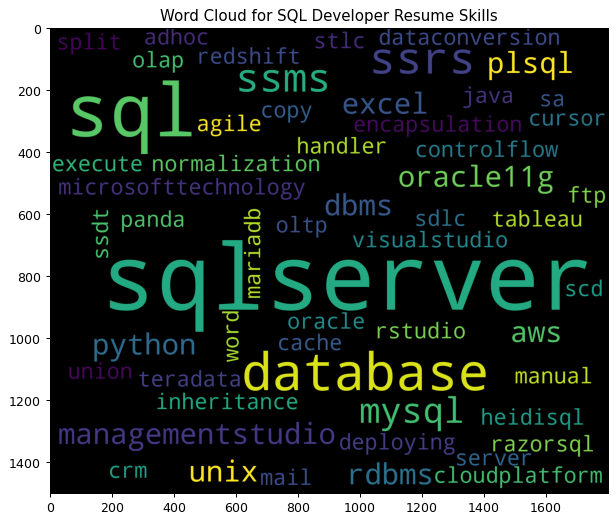

In [45]:
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(sql_words)
plt.title('Word Cloud for SQL Developer Resume Skills')
plt.imshow(wordcloud_stw);

In [46]:
sql_dev_df['Experience'].mean()

1.506875

In [47]:
pd.value_counts(np.array(tokensql)).head(10)

sqlserver    28
sql          17
database      7
ssrs          5
ssms          4
mysql         3
aws           2
unix          2
plsql         2
oracle11g     2
dtype: int64

### Top 10 skills for SQL developer 
* sqlserver          
* sql                
* database           
* ssrs               
* ssms               
* mysql              
* dbms               
* oracle11g          
* excel              
* rdbms       

#### Average Experience for SQL Developer profile is 1.50 years.

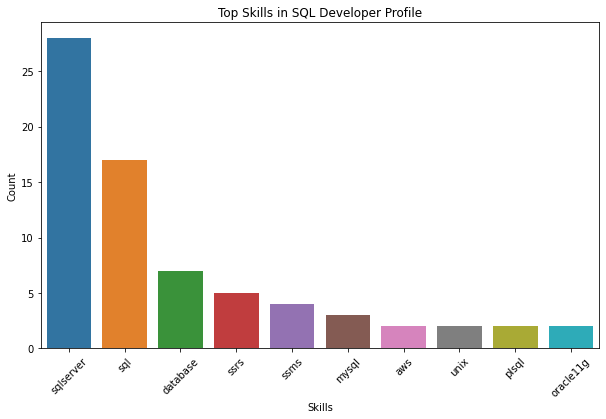

In [48]:
top_sql_skill_df = pd.DataFrame(pd.value_counts(np.array(tokensql)).head(10)).reset_index()
top_sql_skill_df.columns = ['Skills', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(top_sql_skill_df['Skills'], top_sql_skill_df['Count'])
plt.xticks(rotation=45)
plt.title('Top Skills in SQL Developer Profile')
plt.show()

### Extracting skills from Workday Resumes

In [49]:
workday_df = data_set[data_set['Label'] == 'Workday'].reset_index(drop=True)

In [50]:
def get_workday_skills(text):
    text = re.findall('technical skill(.*?)education detail|software product(.*?)ide|erp system(.*?)unix|additional information(.*?)professional experience|workday skill(.*?)marital status|erp(.*?)10|workday skill(.*?)winscp|technical expertise(.*?)work experience|technical expertise(.*?)client|workday skill(.*?)xslt|workday skill(.*?)8|workday functional(.*?)constrained|knowledge skillset(.*?)education qualification|ide(.*?)object|technical skill(.*?)work experience|erp(.*?)project name|workday skill(.*?)client|technical skill(.*?)education summary', text)
    return text


In [51]:
workday_df['processed_skills'] = workday_df['Resumes'].apply(get_workday_skills)

In [52]:
workday_skills = []

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)


for skill in workday_df['processed_skills']:
    result = map(join_tuple_string, skill)
    proc_skill = list(result)
    workday_skills.append(proc_skill)

skill_res = map(join_tuple_string, workday_skills)
final_workday = list(skill_res)
workday_df['processed_skills'] = final_workday

In [53]:
workday_df.head()

,Resumes,Experience,Label,processed_skills
0,chinna subbarayudu dob 06th march 1994 nationa...,5.1,Workday,technology using workday hcm etl informa...
1,name gopi krishna reddy professional summery w...,3.0,Workday,workday hcm reporting integration language x...
2,hari krishna summary result oriented professio...,0.0,Workday,organization inactivate organiza...
3,harikrishna akula summary 52 year experience a...,5.2,Workday,operating system window window linux unix ...
4,himamendu career objective continue growing kn...,0.0,Workday,ntial role responsibility creatio...


In [54]:
workday_df['processed_skills'] = workday_df['processed_skills'].apply(preprocess_text)

In [55]:
all_workday_skills = [' '.join(workday_df['processed_skills'].str.strip('"').tolist())]

In [56]:
tokenworkday = word_tokenize(all_workday_skills[0])
# stop_words_workday = list(set(stopwords.words('english')))
removal_words_workday = ['employee','session', 'specified', 'revenue', 'car', 'balance', 'created', 'integration', 'using'
                         'value', 'narayana', 'till', 'demographic', 'range', 'error', 'description', 'cse', '17', 'system',
                     'connector',   'daily', 'fit', 'emergency', 'actionable', 'solve', 'ece', 'creation', '2', 'designer',
                         'scope', 'airline', 'resolve', 'implement', 'momentum', 'better', 'prioritizing', 'anantapur',
                         'regular', 'deadline', 'statement', 'training', 'plan', 'day', 'familiar', 'false', 'formerly',
                         'leading', 'several', 'nbkrist', 'reported', 'provided', 'venture', 'supplier', 'manufacturing',
                         'may2019', 'ab', 'iam', 'mar', 'recovery', 'many', 'health', 'sup', 'current', 'working', 'chinna',
                         'generator', 'zenefits', 'grooming', 'detailed', 'perform', 'newly', 'educational', 'subbarayudus', 
                         'panel', 'currently', 'success', 'cross', 'designedand', 'anniversary', '401', 'full', '70', 'biggest',
                         'incorporated', 'bumiputra', 'lang', '9', 'city', 'leave', 'used', 'exposure', 'alone', 'news',
                         'adding', 'absence', 'understand', 'backlog', 'bangalore', 'add', 'editing', 'benefit',
                         'monthly', 'thorough', 'pull', 'namesake', 'guntur', 'internally', 'b', 'dealership', 
                         'understanding', 'declaration', '365', 'specification', 'leveraged', 'requirement', '4', 
                         'nellore', 'extensively', 'reuters', 'assignment', 'po', 'key', 'across', 'restriction',
                         'edits', 'oxygen', 'making', 'wipro', 'people', 'headcount', 'mtech', 'process', 'gathering', 
                         'quartered', 'united', 'particularly', 'company', '20', 'info', 'highly', 'barcode', 'small',
                         'sancus', 'us', 'requested', 'org', 'interval', 'skill', 'career', 'university', 'shutting', 
                         'updating', 'proactively', 'party', 'tool', 'like', 'anyone', 'multinational', 'declare', 'related', 
                         '5', 'broker', 'largest', 'malaysia', 'document', 'involving', 'yogi', 'preventive', 'based',
                         'composite', '19', 'using', 'ltd', 'sequence', 'responsibility', 'currency', 'activity', 'different',
                         'environment', 'jul', 'professional', 'complete', 'well', 'wherever', 'record', 'utilize', 
                         'insurance', 'prototyping', 'field', 'lead', 'information', 'text', 'gap', 'averaging', 'enable',
                         'calculation', 'handled', 'operation', 'closely', 'ar', 'year', 'pe', 'index', 'family', 'source',
                         'discussion', 'bonus', 'mentioned', 'infotech', 'simple', 'pv', 'configured', 'launch', 'client', 
                         'create', 'additive', 'deliver', 'cell', 'capturing', 'type', 'selected', 'solving', '32', 'center',
                         'arrange', 'post', 'remove', 'hierarchy', 'experienced', 'growth', 'brand', '2012', 'map', 
                         'production', 'activating', 'master', 'august', 'history', 'organization', 'july', 'receive', 
                         'onboarding', 'bulk', 'ranging', 'ersonal', 'interact', 'problem', 'rule', 'managing', 'life',
                         'x', 'applicant', 'app', 'structure', 'catamaran', 'trail', 'vanguard', 'spend', 'issg', 'manager',
                         'engineering', 'terminal', 'kiosk', 'consumables', 'provider', 'discovery', 'promotion', 'energy',
                         'k', 'policy', 'sharing', 'significant', 'spin', 'onetime', 'aug', 'integrating', '35', 'necessary',
                         'enables', 'boarding', 'instance', 'p', 'solar', 'maintain', 'board', 'communicate', 'set', '2017', 
                         'supported', 'demographical', 'program', '91', 'utp', 'incident', 'aging', 'payment', 'validating', 
                         'york', 'eg', 'college', 'sub', 'one', 'layout', 'location', 'resolved', '2016', 'send', 
                         'demonstrate', 'outbound', 'assigned', 'chennai', 'processing', 'step', 'unit', 'merit',
                         '27', 'preparing', 'design', 'bug', 'diagram', 'kl', 'accessory', 'director', 'commerce',
                         'madeeswar', '2006', 'conglomerate', 'technical', 'job', '7', 'lower', 'multiple', 'getting',
                         'aviation', 'dec', 'task', 'practice', 'prompt', 'standard', 'writing', 'mean', 'release', 'contact',
                         'per', 'interpersonal', 'true', 'required', 'basis', 'background', 'taking', 'function', 'kind',
                         'view', 'plant', 'trending', 'u', 'consumer', 'column', 'technology', 'achieve', 'eligibility',
                         'stand', 's', 'manufacturer', 'corporation', 'techno', 'managed', 'inc', 'action', 'banglore', 
                         'fixing', 'project', 'hr', 'valuable', 'counting', 'serving', 'sept', 'performed', 'desire', 
                         'completed', 'education', 'therapy', 'clarification', 'btech', 'framed', 'dash', 'engine',
                         'integration', 'according', 'utility', 'allowance', 'output', 'concept', 'initiate', 'basic', 
                         'alliance', 'primary', 'grade', 'proven', 'profile', 'rise', '85', 'anantapuramu', 'fetch', 
                         'integrated', 'migrating', 'retailer', 'oct', 'builder', 'september', 'academic', 'delivery',
                         'boston', 'position', 'deliverable', 'care', 'resume', 'strong', 'done', 'applying', 'june',
                         '2019to', 'clothing', 'hyderabad', 'construction', 'bridge', 'built', 'shared', 'wide',
                         'translating', 'staffing', 'product', 'involved', 'resolution', 'kakinada', 'corrective',
                         'input', 'movement', 'banner', 'utilizing', 'tenet', 'defining', 'erp', 'verifying', 'account', 
                         'backup', 'feb', 'world', 'acceptance', 'competitive', 'address', 'towards', 'stakeholder', 
                         'dec2017', 'coordinate', 'medical', 'safeway', 'sending', 'testing', 'functionality', 'downstream', 
                         '28', 'thomson', 'relationship', 'setup', 'monitored', 'analysing', 'electric', 'coordinator', 
                         'progile', 'terminate', 'cash', 'role', 'legacy', 'member', 'test', 'kadapa', 'level', 'national',
                         'american', '2018', 'monitoring', 'emea', 'rx', 'may', 'supervisor', 'individual', 'goal', '2019',
                         'excel', 'filter', 'proficient', 'added', 'generic', 'customer', 'isg', 'transformer', '30',
                         'initiation', 'designation', 'methodology', 'inactivate', 'develop', 'accomplish', 'computer', 
                         'issue', 'area', 'provides', 'biologics', 'qualifier', 'pune', 'november', 'language', 'electronic', 
                         'starting', 'incorporating', 'notification', 'etv', 'coordinated', 'delivered', 'scale', '81', 
                         'although', 'termination', 'offer', 'new', 'sign', 'qualification', '851', 'pvt', 'analyzing', 
                         'transfer', 'ncr', 'hourly', 'automotive', 'hereby', 'visio', '2009', 'previous', 'parsing', 'give',
                         'converting', 'cr', 'external', 'peci', 'build', 'm', '2015', 'meet', 'provide', 'service', 'ct', 
                         'superior', 'centre', 'domain', 'provisioning', 'ticketing', 'expertise', 'help', 'future', 'strongly',
                         'community', 'self', 'west', 'first', 'mca', 'complex', 'comparison', 'attribute', 'definition',
                         'time', 'infosys', 'phase', 'get', 'software', 'duration', 'file', 'scheduling', 'customized',
                         'providing', 'need', 'subordinate', 'knowledge', 'installing', 'developed', 'look', 'tested',
                         'independently', '8', 'capital', 'worker', 'maximum', 'single', 'bsc', 'third', 'table', 'flow',
                         'scheduler', 'filtering', 'az', 'right', 'st', 'lookup', 'pay', 'maintenance', 'engineer', 'matter',
                         'workdayconsultant', 'presenting', 'participate', 'including', 'include', 'excellent', 'pharma',
                         'six', '80', 'population', 'jntu', 'peer', 'player', 'bachelor', 'reliable', 'name', 'register',
                         'result', 'office', 'grouping', 'ability', 'nagarjuna', 'change', 'hill', 'conjunction', 'talent',
                         'hand', 'written', 'online', 'consultant', 'order', 'point', 'group', 'existing', 'planning',
                         'segment', 'upgrade', 'studying', 'custom', 'call', 'personal', 'path', 'request', 'various',
                         'building', 'general', 'batch', 'rate', 'prepared', '36', 'term', 'recycling', 'jun', 'joiner', 
                         'particular', 'worldwide', 'via', 'capability', 'extensive', 'transact', 'bank', 'category',
                         'modification', 'vemana', 'detail', 'publisher', 'collaborating', 'technica', 'fulfilling', 
                         'befit', 'review', 'south', 'sheet', 'functional', 'share', 'make', 'advance', 'good', 'orgs',
                         'successful', 'electronics', 'annual', 'edge', 'end', 'best', 'tc', 'digital', 'date', '2008', 
                         'updated', 'vision', 'deviation', '29', 'salary', 'main', 'scanner', 'absent', 'complexity', 
                         'usa', 'strategy', 'drug', 'arithmetic', 'teller', 'cal', 'onshore', 'following', 'cause', 
                         'alignment', 'along', 'follows', 'alert', 'calc', 'still', 'worked', 'present', 'nov', 'assign',
                         'core', 'every', 'closing', 'state', 'person', 'thing', 'page', 'perspective', 'healthcare',
                         'crystal', 'ap', 'solution', 'fetched', 'setting', 'il', 'failure', 'package', 'industry',
                         'advanced', '3', 'ensure', 'schaumburg', 'raised', 'creating', 'india', 'supply', 'june2019', 
                         'renewable', 'depth', 'execution', 'find', 'experience', 'scenario', 'correction', 'assisting', 
                         'turnover', 'within', 'specific', 'validation', 'shell', 'bharath', 'loaded', 'ge', 'user', 
                         'minimum', 'encountered', 'creatively', 'consistently', 'country', 'ran', '1', 'schedule', 
                         'holding', 'identifying', 'search', 'police', 'produce', 'nt', 'loading', 'application', 'factory',
                         'join', 'soap', 'replicon', 'assigning', 'update', 'responsible', 'shore', 'gene', 'expression', 
                         'studio', 'division', '2013', 'appropriate', 'participated', 'management', 'specialty', 'power',
                         'parent', 'art', 'impact', 'lakh', 'head', 'robust', 'translate', 'tenant', 'designed', 'cycle',
                         'etc', 'weekly', 'menu', 'technically', 'mba', '2014', 'case', 'nga', 'taken', 'modified', 
                         'deduction', 'option', 'also', 'support', 'compensation', 'business', 'summary', 'otp', 'summing',
                         'suite', 'opportunity', 'outlining', 'employment', 'calculated', 'effort', 'criterion', 'maintained', 
                         'framework', 'flexible', 'vendor', 'track', 'rest', 'exchanger', 'uploading', 'site', 'hiring',
                         'performance']
# stop_words_workday.extend(removal_words_workday)
tokenworkday = [token for token in tokenworkday if token not in removal_words_workday]
tokenworkday_final = list(set(tokenworkday))

In [57]:
workday_words = ' '. join(tokenworkday)

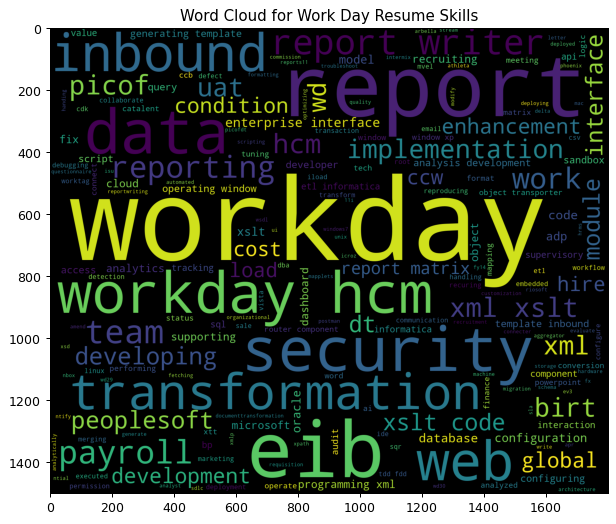

In [58]:
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(workday_words)
plt.title('Word Cloud for Work Day Resume Skills')
plt.imshow(wordcloud_stw);

In [59]:
pd.value_counts(np.array(tokenworkday)).head(10)

workday     213
report      127
eib          72
hcm          52
data         42
security     42
xml          37
xslt         35
inbound      34
web          33
dtype: int64

In [60]:
workday_df['Experience'].mean()

4.276190476190476

### Top 10 skills for Workday 
* workday      
* report       
* eib          
* hcm          
* data 
* security
* xml          
* xslt         
* inbound      
* web              

#### Average Experience for Workday profile is 4.27 years.

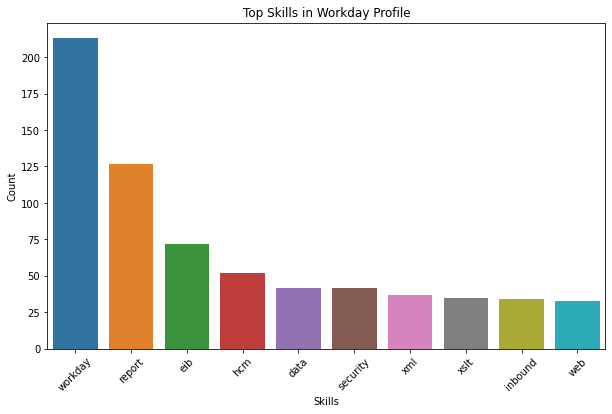

In [61]:
top_workday_skill_df = pd.DataFrame(pd.value_counts(np.array(tokenworkday)).head(10)).reset_index()
top_workday_skill_df.columns = ['Skills', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(top_workday_skill_df['Skills'], top_workday_skill_df['Count'])
plt.xticks(rotation=45)
plt.title('Top Skills in Workday Profile')
plt.show()

### Extracting skills from Peoplesoft Resumes

In [62]:
peoplesoft_df = data_set[data_set['Label'] == 'Peoplesoft'].reset_index(drop=True)

In [63]:
def get_peoplesoft_skills(text):
    text = re.findall('technical skill(.*?)education|technical skill(.*?)professional experience|operating system(.*?)nationality|operating system(.*?)course school|tool used(.*?)training certification|peoplesoft application(.*?)linux|technology tool(.*?)12cr2|technology tool(.*?)project peoplesoft|technology tool(.*?)2008|technical skill(.*?)soft skill|technical skill(.*?)experience summary|people tool(.*?)education|technical summary(.*?)education|technical skill set(.*?)project|software proficiency(.*?)work history|', text)
    return text


In [64]:
peoplesoft_df['processed_skills'] = peoplesoft_df['Resumes'].apply(get_peoplesoft_skills)

In [65]:
peoplesoft_skills = []

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)


for skill in peoplesoft_df['processed_skills']:
    result = map(join_tuple_string, skill)
    proc_skill = list(result)
    peoplesoft_skills.append(proc_skill)

skill_res = map(join_tuple_string, peoplesoft_skills)
final_peoplesoft = list(skill_res)
peoplesoft_df['processed_skills'] = final_peoplesoft

In [66]:
peoplesoft_df['processed_skills'] = peoplesoft_df['processed_skills'].apply(preprocess_text)

In [67]:
all_peoplesoft_skills = [' '.join(peoplesoft_df['processed_skills'].str.strip('"').tolist())]

In [68]:
tokenpeoplesoft = word_tokenize(all_peoplesoft_skills[0])
# stop_words_people = list(set(stopwords.words('english')))
removal_words_peoplesoft = ['handled', 'billing', 'posting', 'design', 'integration','support',
                            'file', 'fix', 'package','component', 'architecture', 'configured',
                            'troubleshooting','update', 'migration', 'installation', 'setup','broker',
                            'upgrade', 'production', 'configuration','scheduler','tool','85610', '10', 
                            'shooting', 'b', 'srm', 'scratch', 'purpose', '10gr3and', 'proven', 'ib', '11',
                            'applying', 'nov', 'request', 'ddd', '121', 'set', '2016', 'includes', 'global',
                            'till', 'sit', 'strong', 'certification', 'compare', 'expertise', 'associate', 'interface',
                            'necessary', 'text', '2', 'duty', 'junior', 'nvision', '90', 'version', 'resolved',
                            'add', '05th', '847', 'u', 'computer', '92', 'created', 'user', 'field', '56',
                            'printed', 'adding', '122', 'attached', 'tailored', 'basic', 'released', 'task',
                            'issued', 'latest', 'efficient', 'identity', 'techmahindra', 'interpersonal', 'issue', 
                            'hindi', 'p', 'industry', 'demo', 'party', 'control', '2007', 'pune', 'excellent', 'non', 
                            'slave', 'birth', 'currently', '10gr3', 'multi', 'order', 'hp', 'mahindra', 'export', '1013',
                            'continuous', 'ansible', 'stored', '05', 'etc', 'phase', 'profile', 
'updated', '65', 'per', 'autosys', 'college', 'offshore', 'utility', 'application','85522', 'tight', '89',
                            'accenture', 'knowledge', 'sign', 'eb', 'object', 'output', 'zero', '2000', 'mac',
                            'checked', 'client', 'detail', 'date', 'weekly', '85525', '9235', '8', 'periodically', 
                            'sex', '855', 'interested', 'eager', 'regularly', 'selected', 'university', 'high', 'event', 
                            'closure', 'business', 'concentrating', 'sound', 'window', 'involved', '15', 'specific', 'dsc',
                            'sys', 'pure', 'middle', 'description', 'executed', 'egg', 'within', 'db2', 'fair', 'mission', 
                            '8x', 'unlocking', 'sheet', 'worked', 'dedicated', 'long', 'beginner', 'invoice', 'required', 
                            'contingency', 'module', 'processing', 'problem', 'adaptive', 'resolving', 'plan', 'requisition',
                            'volume', 'area', '2021', '1123', 'help', 'solving', 'solid', 'assistant', 'opa', 'tamilnadu',
                            'infrastructure', '1990', 'c', 'setting', '11201', 'helped', 'building', 'enable', 'ran', 'depth',
                            'occurred', 'ensuring', 'internal', 'hsbc', 'summary', 'identify', 'gained', 'period', '85506',
                            'maintained', 'lead', 'n', 'assist', 'job', 'acceptance', '80', 'july', '11211213', 'nissan',
                            'account', 'using', 'father', 'usernames', 'schedule', 'pt851', '7039', 'balancing', 'engineer',
                            'related', 'dec', 'campus', 'space', '11204', 'clearing', 'resource', 'apply', 'approval', 
                            'carrying', 'main', 'third', 'mover', 'adminissions', 'strategy', '2018', 'case', 'consistency', 
                            'custom', 'across', 'initial', 'investment', 'id', 'may', 'papa', 'managing', 'iaa', 'integrity',
                            'tax', 'enterprise', 'independent', 'ap', 'ar', '2019', 'defining', 'experiencing', 'counterpart',
                            'bank', 'prepare', 'reported', 'overseeing', 'organization', 'idea', 'get', 'connected', 'new',
                            'eg', 'learner', '848', 'year', 'apps', 'concisely', '11th', 'also', 'without', '64bit', 'pub', 
                            '85706', 'approach', 'success', 'capacity', 'writing', '82', 'goal', 'register', 'quarterly',
                            'phire', 'perfumed', '2008r2', 'receipt', 'cse', 'implementing', 'separate', 'wealth', 
                            'motioning', 'successful', 'hand', 'motivated', 'every', 'procedure', 'managed', 'june2012',
                            'intensively', '85312', 'role', 'oriented', 'soft', 'infotech', 'based', '11220', 'stat', 
                            'ability', 'qatar', 'send', 'iam', 'payable', 'flow', 'arizona', 'purchasing', '1982',
                            'proficiency', 'ltd', 'financial', 'change', 'target', 'origin', 'hosted', 'cache', 'cleared',
                            'solution', 'station', 'entire', 'ac', 'pa', 'interaction', 'working', 'present', 'elastic', 
                            'service', 'professional', 'functionality', 'objective', 'monthly', 'stop', 'financials',
                            'consultant', 'department', '857', 'provide', 'master', 'write', 'compute', 'sub', 'including',
                            'two', '81', 'recruiting', 'single', 'via', 'vinayaka', '2009', 'v', 'india', '854', 'cycle', 
                            'texas', '07th', 'thorough', 'layout', 'record', 'day', '5', 'added', 'andhrapradesh', 'find',
                            'combo', 'implemented', 'pre', 'call', 'amount', 'live', 'inconsistency', 'command', '08', 
                            'sahred', 'health', 'pum', 'responsible', '3year', 'person', 'identifying', '11g', 'jntu',
                            'acceptable', 'quality', 'copy', 'delete', 'people', 'banking', 'ready', 'yes', 'achievement',
                            'expected', '849', 'specialist', 'env', 'easy', 'primary', 'online', 'domain', 'take', 'beyond', 
                            'playbook', 'disaster', 'international', 'done', 'visible', 'patch', 'size', 'providing', '09', 
                            'crystal', '12213', 'k', 'english', 'used', 'june', '50', 'proficient', 'checking', 'read',
                            'engine', 'book', 'performed', 'prod', 'singh', '7052', '85408', 'r1', 'pump', '2010',
                            'functional', 'rotary', 'tech', 'activity', 'open', 'concept', 'refreshed', 'instance', 
                            '2014', 'canada', 'jones', 'proper', 'quick', '2015', 'cold', 'wipro', 'player', 'messaging',
                            'load', 'product', 'individual', 'training', '04th', 'refreshing', 'aug', 'notification', 
                            'effective', 'review', '24', 'experienced', 'modification', 'name', 'environment', 'skill', 
                            'twice', 'ordinated', 'driving', 'chennai', 'examining', 'involving', 'requirement', 'applied',
                            'menu', 'secondary', '6', 'create', 'list', 'kept', 'taking', 'copying', 'kumar', 'language',
                            'resizing', 'limited', 'start', 'followed', 'understanding', 'redesigned', 'release', 
                            'envrironment', 'personal', 'lift', 'information', 'many', 'step', 'purchase', 'locking', 
                            'natural', '1131', 'credit', 'functioning', 'regular', 'benefit', 'crontab', '9', 'gateway',
                            'execution', 'batch', 'physical', 'responsibility', 'code', 'dump', 'designed', 'satyam', 
                            '12c', '12214', '12', 'need', 'current', '922', 'provided', 'extensively', '851', '21', '2012', 
                            'better', 'template', 'contains', '2016r2', 'qualification', 'maintain', 'run', 'journal',
                            'network', 'clear', 'student', 'az', '7', 'central', 'balance', 'situation', 'move', 'technical',
                            'experience', 'life', 'difference', 'formula', 'queue', 'po', 'randstad', 'relocate', 'premise',
                            'go', 'verity', 'socket', 'approver', 'supporting', 'status', 'offline', 'recovery', '90production',
                            'raise', 'property', '2013', 'senior', 'trouble', 'app', '1121', 'bangalore', 'level', 
                            'availability', 'ge', 'assign', 'timely', 'password', 'basis', '850', 'unit', '3',
                            'message', 'certificate', '856', 'hardworking', 'designer', 'post', 'creating', 'sent',
                            'planning', 'installing', 'logical', 'testing', 'company', 'perform', '4', 'bug', 'might',
                            'imported', '12220', 'existing', 'putty', 'reconfiguration', 'dr', 'prepared', 'development', 
                            'hub', '10g', 'process', 'tier', 'exporting', 'system', 'complete', 'hat', 'communication',
                            '103', 'daily', 'qf', 'hot', 'documentation', 'project', 'meeting', 'running', 'connect', '2003',
                            'aided', 'generic', 'adopt', 'check', 'andhra', 'sso', 'report', 'good', '91',
                            'whenever', 'maintenance', 'common', 'manager', '54', 'multiple', 'transportation',
                            'dev', 'self', 'management', '2005', 'logic', 'enhancement', 'maintaining', 'l2', 'cloning', 
                            'manage', 'error', 'pvt', '27th', 'catalogue', '1213', 'state', 'gain', 'different', '2011',
                            'pradesh', 'resolve', 'preparing', 'line', 'leadership', '2008', 'guard', '853', 'reflected',
                            '109', 'care', '2006', 'aspect', '2017', 'various', 'packagees', 'rajeev', '1', 'september',
                            'provate', 'feature', '07', 'download', 'l', 'asset', 'install', 'implement', '852', 'co',
                            'clearly', 'defect', 'test', 'ntt', 'complex', 'bengali', 'content', 'search', 'external',
                            'thrice', '1036', 'like', 'customer', 'duration', 'ping', '2020', 'detailed', 'permission',
                            'centrify', 'housekeeping', 'methodology', 'resetting', 'hyderabad', 'performing', '858', 'total',
                            'location', 'cleaning', 'group', 'contributor', 'deadline', 'signed', 'exposure', 'refresh',
                            'resolution', 'work', 'bachelor', 'form', 'skils', 'jan', '55', 'layer', 'refreshes', 'tuxedo',
                            'performance', 'staffing', 'hazardous', 'monitoring', 'corporation', 'queued', 'ibm', 'port',
                            'implementation', 'installed', 'male', 'understand', 'several', 'failover', 'handling',
                            'document', 'reviewing','bottleneck','bundle','tuning','configuring','image','software','cutomize',
                            'platform','server','migrated','configure','internet','pia','scheduling','monitor','technology',
                            'developer',]
# stop_words_people.extend(removal_words_peoplesoft)
tokenpeoplesoft = [token for token in tokenpeoplesoft if token not in removal_words_peoplesoft]

In [69]:
tokenpeoplesoft_final = list(set(tokenpeoplesoft))

In [70]:
peoplesoft_words = ' '. join(tokenpeoplesoft)

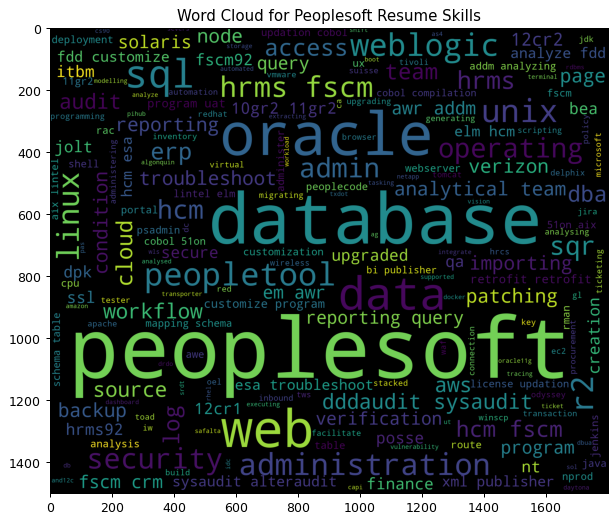

In [71]:
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(peoplesoft_words)
plt.title('Word Cloud for Peoplesoft Resume Skills')
plt.imshow(wordcloud_stw);

In [72]:
peoplesoft_df['Experience'].mean()

4.9306008

In [73]:
pd.value_counts(np.array(tokenpeoplesoft)).head(10)

peoplesoft    144
database       96
oracle         68
web            50
data           38
fscm           29
sql            27
hcm            27
hrms           23
unix           17
dtype: int64

### Top 10 skills for Peoplesoft 
* peoplesoft    
* database       
* oracle         
* web            
* data           
* fscm           
* sql            
* hcm            
* hrms           
* unix      

#### Average Experience for Peoplesoft profile is 4.93 years.

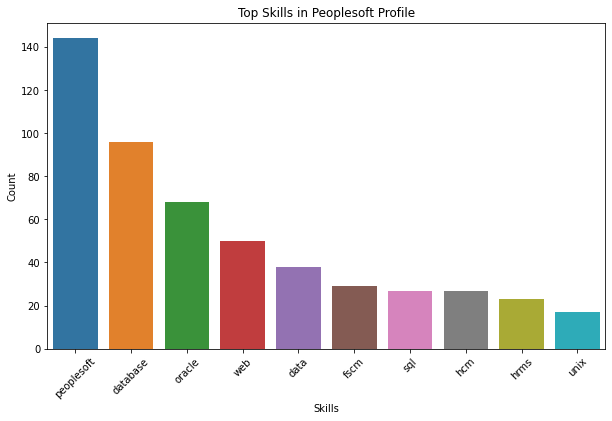

In [74]:
top_peoplesoft_skill_df = pd.DataFrame(pd.value_counts(np.array(tokenpeoplesoft)).head(10)).reset_index()
top_peoplesoft_skill_df.columns = ['Skills', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(top_peoplesoft_skill_df['Skills'], top_peoplesoft_skill_df['Count'])
plt.xticks(rotation=45)
plt.title('Top Skills in Peoplesoft Profile')
plt.show()

### Feature Extraction

In [75]:
skills_list = tokenreact_final + tokensql_final + tokenworkday_final + tokenpeoplesoft_final

In [76]:
data_for_model = data1.copy()
data_for_model.drop(columns=['FileName', 'Experience'], inplace=True)

In [77]:
data_for_model.head()

,Resumes,Label
0,name ravali p curriculum vitae specialization ...,SQL Developer
1,susovan bag seeking challenging position field...,SQL Developer
2,kanumuru deepak reddy career objective secure ...,React JS Developer
3,haripriya battina experience ui developer reac...,React JS Developer
4,kamalakar reddy linked http wwwlinkedincom kam...,React JS Developer


In [78]:
def keyword_replacement(text):
    text = text.replace('web technology', 'web_technology')
    text = text.replace('visual studio', 'visual_studio')
    text = text.replace('operating system', 'operating_system')
    text = text.replace('sql server', 'sql_server')
    text = text.replace('react j', 'react_js')
    text = text.replace('spring boot', 'spring_boot')
    text = text.replace('node j', 'node_js')
    text = text.replace('window xp', 'window_xp')
    text = text.replace('designing website', 'website_designing')
    text = text.replace('programming language', 'programming_language')
    text = text.replace('responsive design', 'responsive_design')
    text = text.replace('sql server', 'sql_server')
    text = text.replace('pl sql', 'pl_sql')
    text = text.replace('management studio', 'management_studio')
    text = text.replace('oracle 11g', 'oracle11g')
    text = text.replace('microsoft technology', 'microsoft_technology')
    text = text.replace('visual studio', 'visual_studio')
    text = text.replace('cloud platform', 'cloud_platform')
    text = text.replace('control flow', 'control_flow')
    text = text.replace('data conversion', 'data_conversion')
    text = text.replace('programming language', 'programming_language')
    text = text.replace('p sql', 'p_sql')
    
    return text

In [79]:
data_for_model['Resumes'] = data_for_model['Resumes'].apply(keyword_replacement)

In [80]:
data_for_model['skills_extracted'] = data_for_model['Resumes'].apply(filter_skills, skills=skills_list)

In [81]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

In [82]:
# data_for_model['GroundTruth'] = encoder.fit_transform(data_for_model['Label'])

In [83]:
# data_for_model.GroundTruth.value_counts()

In [84]:
data_for_model.head()

,Resumes,Label,skills_extracted
0,name ravali p curriculum vitae specialization ...,SQL Developer,science developing manual sdlc adhoc stlc regr...
1,susovan bag seeking challenging position field...,SQL Developer,science programming c c java html sql data dbm...
2,kanumuru deepak reddy career objective secure ...,React JS Developer,secure build develop developer website develop...
3,haripriya battina experience ui developer reac...,React JS Developer,ui developer reactjs javascript source work ui...
4,kamalakar reddy linked http wwwlinkedincom kam...,React JS Developer,http ui development enterprise web development...


In [85]:
data_for_model.drop(columns=['Resumes'], inplace=True)

### TF-IDF Vectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [87]:
#  Split the data into training and testing sets
X = data_for_model['skills_extracted'].values
y = data_for_model['Label'].values

In [88]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', decode_error='replace', use_idf=True, 
                             norm='l2', max_features=1000, smooth_idf=True, ngram_range=(1,1))

text_vectorizer = vectorizer.fit(X)
X_tfidf_vectorized = text_vectorizer.transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vectorized, y, test_size=0.2, random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 504)
(63,)
(16, 504)
(16,)


In [91]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import LeaveOneOut

In [92]:
# Define a list of classification models

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'LGBoost Classifier' : LGBMClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Navie Bayes' :  GaussianNB()
    
}

In [93]:
# Iterate over the models
for key in models:
    
    print(f"*** {key} ***")
    
    # #Fit the model
    model = models[key]
    x_train = X_train.toarray()
    x_test = X_test.toarray()
    model.fit(x_train, y_train)
#     kf = KFold(n_splits= 10)
#     result = cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv= kf)
    
    y_pred = model.predict(x_test)
    
    report = classification_report(y_test, y_pred)
    print(report)
    print("========================================================")


*** K-Nearest Neighbors ***
                    precision    recall  f1-score   support

        Peoplesoft       0.83      1.00      0.91         5
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.94        16
         macro avg       0.96      0.92      0.93        16
      weighted avg       0.95      0.94      0.93        16

*** LGBoost Classifier ***
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.94        16
         macro avg       0.96      0.92      0.93        16
      weighted avg       0.95      0.94 

#### Grid Search for best hyperparameters for Random Forest

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
rf_model = RandomForestClassifier()
grid_space={'max_depth':[5,10,15,20,25],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [96]:
grid = GridSearchCV(rf_model,param_grid=grid_space,cv=10,scoring='accuracy')
model_grid = grid.fit(x_train, y_train)

In [97]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score is: 0.9833333333333334


In [98]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=7, 
                             min_samples_leaf=3, min_samples_split=2, class_weight='balanced_subsample')

In [99]:
randomforest_model = clf.fit(x_train, y_train)

In [100]:
train_preds = randomforest_model.predict(x_train)
test_preds = randomforest_model.predict(x_test)

In [101]:
print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Training accuracy:  0.9841269841269841
Test accuracy:  0.875


#### Saving model

In [102]:
all_models = {"skills": skills_list, 
             "text_vectorizer": text_vectorizer,
             "resume_model": randomforest_model}

In [103]:
import pickle
from pickle import dump,load
filename = 'all_models.pkl'
pickle.dump(all_models, open(filename, 'wb'))

### Bag of Words (Unigram)

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))

In [106]:
unigram_vectorizer.fit(X)
X_unigram_vectorized = unigram_vectorizer.transform(X)

In [107]:
X_unigram_vectorized

<79x504 sparse matrix of type '<class 'numpy.int64'>'
	with 3994 stored elements in Compressed Sparse Row format>

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_unigram_vectorized, y, test_size=0.2, random_state=42)

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 504)
(63,)
(16, 504)
(16,)


In [110]:
# Define a list of classification models

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'LGBoost Classifier' : LGBMClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Navie Bayes' :  GaussianNB()
    
}

In [111]:
# Iterate over the models
for key in models:
    
    print(f"*** {key} ***")
    
    # #Fit the model
    model = models[key]
    x_train = X_train.toarray()
    x_test = X_test.toarray()
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    report = classification_report(y_test, y_pred)
    print(report)
    print("========================================================")


*** K-Nearest Neighbors ***
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.94        16
         macro avg       0.96      0.92      0.93        16
      weighted avg       0.95      0.94      0.93        16

*** LGBoost Classifier ***
                    precision    recall  f1-score   support

        Peoplesoft       1.00      0.80      0.89         5
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       0.75      1.00      0.86         3

          accuracy                           0.88        16
         macro avg       0.90      0.87      0.86        16
      weighted avg       0.90      0.88 